In [234]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from math import sqrt

In [235]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [236]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [237]:
df.shape

(607, 12)

In [238]:
types = df.dtypes
types

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

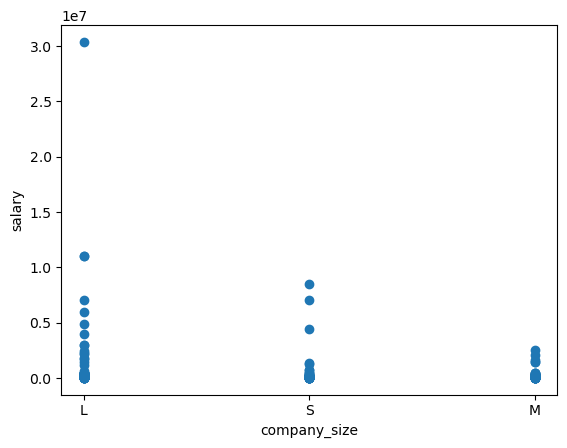

In [239]:
plt.xlabel('company_size')
plt.ylabel('salary')
plt.scatter(df['company_size'],df['salary'])

<BarContainer object of 607 artists>

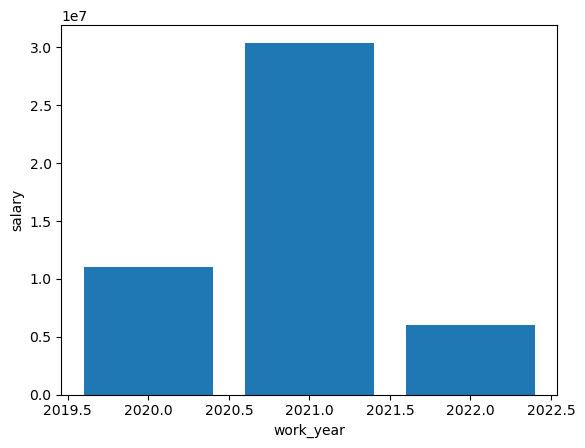

In [240]:
plt.xlabel('work_year')
plt.ylabel('salary')
plt.bar(df['work_year'],df['salary'])

In [241]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [242]:
X = df.drop(['Unnamed: 0','salary_currency','salary_in_usd','employee_residence'],axis='columns')
X

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,100,US,M
603,2022,SE,FT,Data Engineer,126000,100,US,M
604,2022,SE,FT,Data Analyst,129000,0,US,M
605,2022,SE,FT,Data Analyst,150000,100,US,M


In [243]:
X.shape

(607, 8)

In [244]:
y = df.salary
y

0       70000
1      260000
2       85000
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary, Length: 607, dtype: int64

In [245]:
X['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [246]:
X['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [247]:
com_size = {'S': 1,'M': 2,'L': 3}
X.company_size = [com_size[item] for item in X.company_size]
X.head()

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,0,DE,3
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,1
2,2020,SE,FT,Big Data Engineer,85000,50,GB,2
3,2020,MI,FT,Product Data Analyst,20000,0,HN,1
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,3


In [248]:
X['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [249]:
X['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [250]:
le = LabelEncoder()

In [251]:
X.experience_level = le.fit_transform(X.experience_level)
X.head()

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,2020,2,FT,Data Scientist,70000,0,DE,3
1,2020,3,FT,Machine Learning Scientist,260000,0,JP,1
2,2020,3,FT,Big Data Engineer,85000,50,GB,2
3,2020,2,FT,Product Data Analyst,20000,0,HN,1
4,2020,3,FT,Machine Learning Engineer,150000,50,US,3


(array([ 83., 326., 198.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <BarContainer object of 3 artists>)

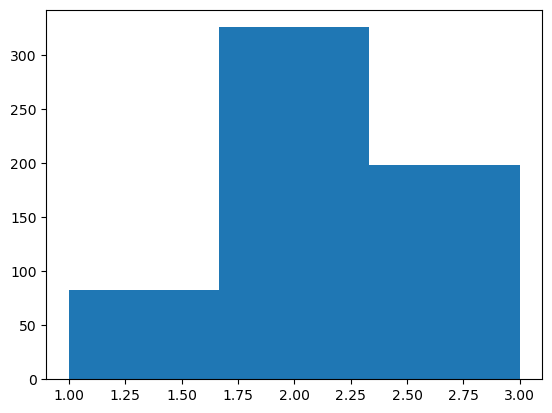

In [252]:
plt.hist(X['company_size'],bins=3)

<BarContainer object of 607 artists>

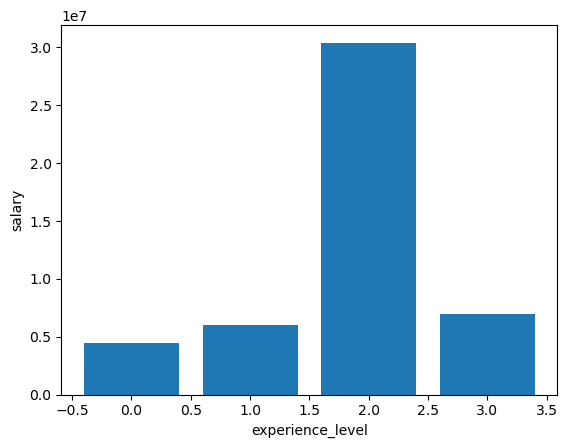

In [253]:
plt.xlabel('experience_level')
plt.ylabel('salary')
plt.bar(X['experience_level'],df['salary'])

In [254]:
X['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [255]:
X['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [256]:
X['company_location'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [257]:
X.head()

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,2020,2,FT,Data Scientist,70000,0,DE,3
1,2020,3,FT,Machine Learning Scientist,260000,0,JP,1
2,2020,3,FT,Big Data Engineer,85000,50,GB,2
3,2020,2,FT,Product Data Analyst,20000,0,HN,1
4,2020,3,FT,Machine Learning Engineer,150000,50,US,3


In [258]:
X.shape

(607, 8)

In [259]:
ct = ColumnTransformer(transformers=[
    ('transform', OneHotEncoder(sparse=False,drop='first'), ['employment_type','job_title','company_location'])
],remainder = 'passthrough')

In [260]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, ..., 7.00e+04, 0.00e+00, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 2.60e+05, 0.00e+00, 1.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 8.50e+04, 5.00e+01, 2.00e+00],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.29e+05, 0.00e+00, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.50e+05, 1.00e+02, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 2.00e+05, 1.00e+02, 3.00e+00]])

In [261]:
X.shape

(607, 106)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [263]:
X_train

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.5000e+05, 1.0000e+02,
        3.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 3.7456e+04, 5.0000e+01,
        3.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 5.0000e+04, 0.0000e+00,
        2.0000e+00],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0200e+05, 0.0000e+00,
        2.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.4000e+05, 0.0000e+00,
        2.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 5.0000e+04, 0.0000e+00,
        2.0000e+00]])

In [264]:
X_train.shape

(485, 106)

In [265]:
y_train

21     450000
105     37456
373     50000
378    208775
471     50000
        ...  
218     75000
223     40900
271    102000
474    140000
355     50000
Name: salary, Length: 485, dtype: int64

In [266]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [267]:
model.predict(X_test)

array([ 200000.        ,  106260.        ,   60000.        ,
        123000.        ,  105400.        ,   85000.        ,
       2200000.        ,   78000.        ,  115934.        ,
         87000.        ,  118000.        ,  120000.        ,
         70000.        ,  150000.        ,   37000.        ,
         75000.        ,  154000.        ,   82500.        ,
        138600.        ,  189650.        ,  157000.00061718,
        135000.        ,   65000.        ,   51999.        ,
       4450000.        ,  209100.        ,   93150.        ,
        140000.        ,   67000.        ,  181940.        ,
        235000.        ,   74000.        ,  105000.        ,
        160000.        ,   34000.        ,   45000.        ,
         90000.        , 2500000.        ,  130000.        ,
        150000.        ,   69999.        ,   13999.99999999,
       7000000.        ,  175000.        ,  300000.        ,
        147000.        ,   60000.        ,  110000.        ,
         18999.99999999,

In [268]:
model.score(X_test,y_test)

1.0

In [269]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rse = mean_squared_error(y_test, y_pred)
rmse = sqrt(rse)

In [270]:
print('R-squared:', r2)
print("Mean Squared Error:",mse)
print("Relative Squared Error:",rse)
print("Root Mean Squared Error: ", rmse)

R-squared: 1.0
Mean Squared Error: 9.366637659076747e-09
Relative Squared Error: 9.366637659076747e-09
Root Mean Squared Error:  9.67813910784338e-05
